In [1]:
from utils import *
from modules import *
import numpy as np 
import pandas as pd
from PIL import Image
import os
from os import listdir
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import rand_score,adjusted_rand_score
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings("ignore")

## Lineaire

In [2]:
# definir un jeu de données lineairement separable 
seed = 42
np.random.seed(seed)
pos_cen = (-12, -12)
pos_sig = [[1, 4], [4, 1]]

neg_cen = (-2, -2)
neg_sig = [[1, 5], [4, 1]]
data,labels = genere_dataset_gaussian(pos_cen,pos_sig,neg_cen,neg_sig,100,-1,1)
labels = labels.reshape(-1,1)

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 2772.98it/s]


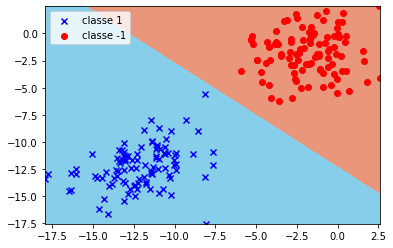

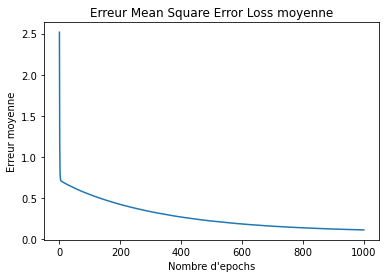

Accuracy  :  1.0


In [3]:
# definir un reseau linaire
facteur_norma = 0.4
plage_biais = (0,1)
neuro_i = 2
neuro_o = 1
batch_size = 50
epochs = 1000

lineaire = ModuleLineaire(neuro_i,neuro_o,plage_biais,facteur_norma,init=1)
mseloss = MSELoss()
network_layers = [lineaire]
network = Sequentiel(network_layers)

opti = Optim(network,mseloss,1e-5)
opti.SGD(data,labels,batch_size,epochs)
opti.affichage(data,labels)

## Non lineaire

100%|██████████████████████████████████████| 1000/1000 [00:02<00:00, 384.44it/s]


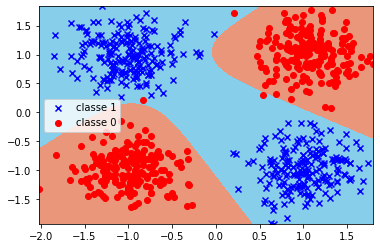

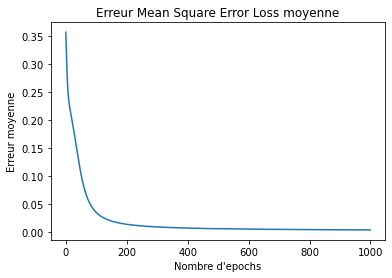

Accuracy  :  0.99625


In [4]:
# definir un jeu de données XOR

seed = 42
np.random.seed(seed)
data_xor , labels_xor = create_XOR(200,0.1)


neuro_i_1 = 2
neuro_o_1 = 4
neuro_i_2 = 4
neuro_o_2 = 1
facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 50
epochs = 1000


facteur_norma = 0.8
lineaire_1 = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2 = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
mseloss = MSELoss()


network_layers = [lineaire_1,TanH,lineaire_2,sigmoide]
network = Sequentiel(network_layers)


opti = Optim(network,mseloss,1e-3)
opti.SGD(data_xor,labels_xor,batch_size,epochs)
opti.affichage(data_xor,labels_xor)

100%|██████████████████████████████████████| 1000/1000 [00:03<00:00, 252.03it/s]


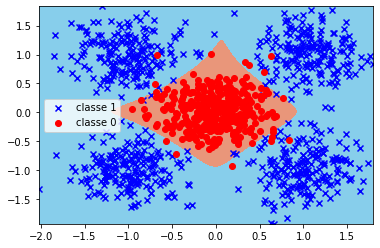

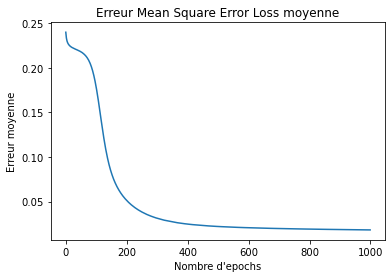

Accuracy  :  0.9825


In [5]:
# definir un jeu de données XOR

seed = 42
np.random.seed(seed)
data_dirac , label_dirac = create_data_dirac(200,0.1)


neuro_i_1 = 2
neuro_o_1 = 4
neuro_i_2 = 4
neuro_o_2 = 1
facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 50
epochs = 1000


facteur_norma = 0.8
lineaire_1 = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2 = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
mseloss = MSELoss()


network_layers = [lineaire_1,TanH,lineaire_2,sigmoide]
network = Sequentiel(network_layers)


opti = Optim(network,mseloss,1e-3)
opti.SGD(data_dirac,label_dirac,batch_size,epochs)
opti.affichage(data_dirac,label_dirac)

## Multi Classe

In [3]:
import pickle as pkl
data = pkl.load(open("data/usps.pkl",'rb'))

X_train = data["X_train"]
Y_train = data["Y_train"]
X_test = data["X_test"]
Y_test = data["Y_test"]

In [ ]:
tsne = TSNE(n_components=2, init='pca',n_iter=500, verbose=0)
repre_2D = tsne.fit_transform(X_train)

plt.title("Representation de l'espace d'origine train apres une t-SNE sur USPS")
plt.scatter(repre_2D[:,0],repre_2D[:,1],c=Y_train)
plt.show()

repre_2D = tsne.fit_transform(X_test)

plt.title("Representation de l'espace d'origine test apres une t-SNE sur USPS")
plt.scatter(repre_2D[:,0],repre_2D[:,1],c=Y_test)
plt.show()

100%|███████████████████████████████████████████| 50/50 [03:07<00:00,  3.75s/it]


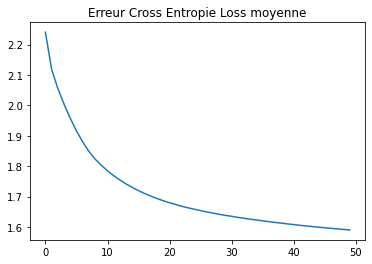

Accuracy  :  0.934339380317868


In [6]:
np.random.seed(42)
nb_classes = len(np.unique(Y_train))
n_samples = X_train.shape[0]

neuro_i_1 = 256
neuro_o_1 = 120
neuro_i_2 = 120
neuro_o_2 = 60
neuro_i_3 = 60
neuro_o_3 = 10
facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 50
epochs = 50


facteur_norma = 0.8
lineaire_1 = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2 = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
lineaire_3 = ModuleLineaire(neuro_i_3 ,neuro_o_3 ,plage_biais,facteur_norma,init=1)
TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
mseloss = MSELoss()
CE = CrossEntropieLoss(nb_classes)
softmax = SoftMax()


network_layers = [lineaire_1,TanH,lineaire_2,TanH,lineaire_3,softmax]
network = Sequentiel(network_layers)

opti = Optim(network,CE,1e-3)
opti.SGD(X_train,Y_train,batch_size,epochs)
opti.affichage(X_train,Y_train)

In [7]:
print("Accuracy sur le train : ",opti.getNetwork().accuracy(X_train,Y_train))
print("Accuracy sur le test : ",opti.getNetwork().accuracy(X_test,Y_test))

Accuracy sur le train :  0.934339380317868
Accuracy sur le test :  0.8419680677745194


## Auto-encodeur

### Encodage d'images

Optimisation
Batch size :  100
Epochs :  100
Learning rate :  0.0001


100%|█████████████████████████████████████████| 100/100 [04:48<00:00,  2.89s/it]


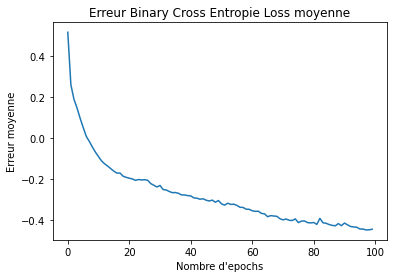

In [4]:
np.random.seed(42)
nb_classes = len(np.unique(Y_train))
n_samples = X_train.shape[0]

neuro_i_1 = 256
neuro_o_1 = 160
neuro_i_2 = 160
neuro_o_2 = 120
neuro_i_3 = 120
neuro_o_3 = 60
neuro_i_4 = 60
neuro_o_4 = 10
facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 100
epochs = 100
nb_couches = 4


facteur_norma = 0.8



lineaire_1_enc = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_enc = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
lineaire_3_enc = ModuleLineaire(neuro_i_3 ,neuro_o_3 ,plage_biais,facteur_norma,init=1)
lineaire_4_enc = ModuleLineaire(neuro_i_4 ,neuro_o_4 ,plage_biais,facteur_norma,init=1)

lineaire_1_dec = ModuleLineaire(neuro_o_1 ,neuro_i_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_dec = ModuleLineaire(neuro_o_2 ,neuro_i_2 ,plage_biais,facteur_norma,init=1)
lineaire_3_dec = ModuleLineaire(neuro_o_3 ,neuro_i_3 ,plage_biais,facteur_norma,init=1)
lineaire_4_dec = ModuleLineaire(neuro_o_4 ,neuro_i_4 ,plage_biais,facteur_norma,init=1)

TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
BCE = BinaryCrossEntropie()


network_layers = [lineaire_1_enc,TanH,lineaire_2_enc,TanH,lineaire_3_enc,TanH,lineaire_4_enc,TanH,
                  lineaire_4_dec,TanH,lineaire_3_dec,TanH,lineaire_2_dec,TanH,lineaire_1_dec,sigmoide]
network = Sequentiel(network_layers)

auto_encodeur_usps = AutoEncodeur(network,BCE)

auto_encodeur_usps.optimisation(X_train,Y_train,batch_size,epochs,1e-4)

#### Train

In [5]:
latent_repre = auto_encodeur_usps.encode(X_train)
X_train_hat = auto_encodeur_usps.decode(latent_repre)

In [21]:

def evaluation(datas,labels):
    titles = ["X_train","Representation Latente","X_train_hat"]
    for i,data in enumerate(datas):

        shape = data.shape[1]
        nb_classes = len(np.unique(labels))
        n_samples = X_train.shape[0]

        neuro_i_1 = shape
        neuro_o_1 = shape // 2
        neuro_i_2 = shape // 2
        neuro_o_2 = shape // 4
        neuro_i_3 = shape // 4
        neuro_o_3 = nb_classes
        facteur_norma = 0.4
        plage_biais = (0,1)
        batch_size = 100
        epochs = 50


        facteur_norma = 0.8
        lineaire_1 = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
        lineaire_2 = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
        lineaire_3 = ModuleLineaire(neuro_i_3 ,neuro_o_3 ,plage_biais,facteur_norma,init=1)
        TanH = ModuleTanH()
        sigmoide = ModuleSigmoide()
        mseloss = MSELoss()
        CE = CrossEntropieLoss(nb_classes)
        softmax = SoftMax()


        network_layers = [lineaire_1,TanH,lineaire_2,TanH,lineaire_3,softmax]
        network = Sequentiel(network_layers)

        print("Optimisation de : ",titles[i])
        opti = Optim(network,CE,1e-3)
        opti.SGD(data,labels,batch_size,epochs)


        print("Accuracy sur les images issues de l'auto encodeur",opti.getNetwork().accuracy(data,labels))    

        kmeans = KMeans(n_clusters=10, random_state=0, max_iter=1000).fit(data)
        yhat = kmeans.labels_

        print("Pureté du clustering : ",cluster_purity(yhat,labels))
        print("Rand score  : ",rand_score(yhat,labels))
        print("Adjusted Rand Score : ",adjusted_rand_score(yhat,labels))
        print()


In [17]:
datas = [X_train,latent_repre,X_train_hat]
evaluation(datas,Y_train)

Optimisation de :  X_train


100%|███████████████████████████████████████████| 50/50 [00:46<00:00,  1.09it/s]


Accuracy sur les images issues de l'auto encodeur 0.9288810402953925
Pureté du clustering :  0.7068550329105795
Rand score  :  0.9131695728218426
Adjusted Rand Score :  0.5448117147373678

Optimisation de :  Representation Latente


100%|███████████████████████████████████████████| 50/50 [00:03<00:00, 14.95it/s]


Accuracy sur les images issues de l'auto encodeur 0.523840102745224
Pureté du clustering :  0.6837373575212715
Rand score  :  0.9082111011817948
Adjusted Rand Score :  0.5199676370093268

Optimisation de :  X_train_hat


100%|███████████████████████████████████████████| 50/50 [00:40<00:00,  1.22it/s]


Accuracy sur les images issues de l'auto encodeur 0.8383368116872693
Pureté du clustering :  0.7153636217691444
Rand score  :  0.9131331756397063
Adjusted Rand Score :  0.5514264502554621



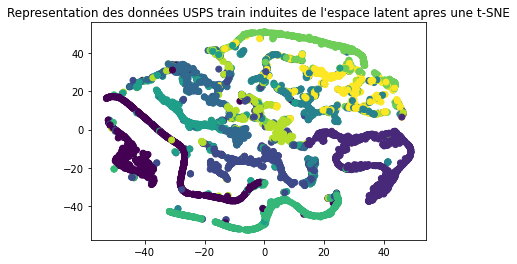

In [5]:
tsne = TSNE(n_components=2, init='pca',n_iter=500, verbose=0)
repre_2D = tsne.fit_transform(X_train_hat)

plt.title("Representation des données USPS train induites de l'espace latent apres une t-SNE")
plt.scatter(repre_2D[:,0],repre_2D[:,1],c=Y_train)

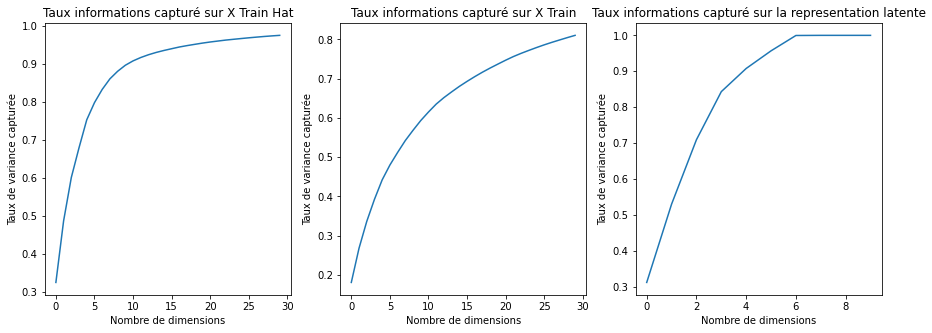

In [8]:
pca_1 = PCA(n_components=30,random_state=96)
pca_1.fit(X_train_hat)

pca_2 = PCA(n_components=30,random_state=96)
pca_2.fit(X_train)

pca_3 = PCA(n_components=10,random_state=96)
pca_3.fit(latent_repre)


plt.figure(figsize=(15,5))

plt.subplot(131)
plt.plot(np.cumsum(pca_1.explained_variance_ratio_))
plt.title("Taux informations capturé sur X Train Hat")
plt.xlabel("Nombre de dimensions")
plt.ylabel("Taux de variance capturée")


plt.subplot(132)
plt.plot(np.cumsum(pca_2.explained_variance_ratio_))
plt.title("Taux informations capturé sur X Train")
plt.xlabel("Nombre de dimensions")
plt.ylabel("Taux de variance capturée")


plt.subplot(133)
plt.plot(np.cumsum(pca_3.explained_variance_ratio_))
plt.title("Taux informations capturé sur la representation latente")
plt.xlabel("Nombre de dimensions")
plt.ylabel("Taux de variance capturée")

plt.show()

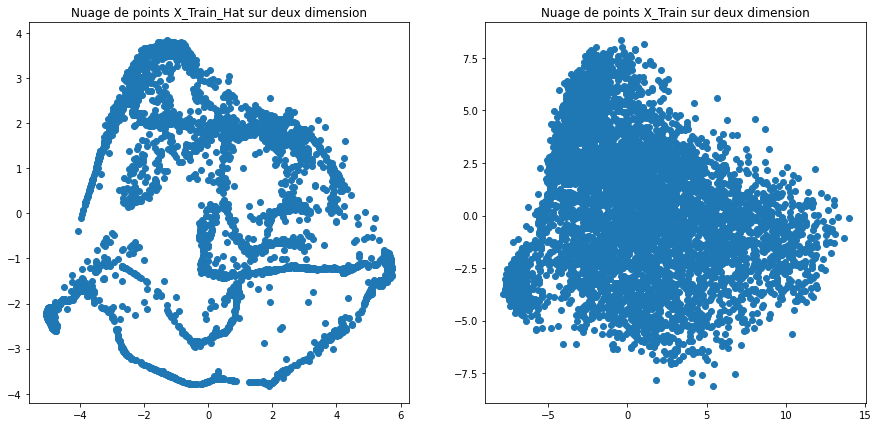

In [9]:
X_train_hat_pca = pca_1.transform(X_train_hat)
X_train_pca = pca_2.transform(X_train)

plt.figure(figsize=(15,7))

plt.subplot(121)
plt.scatter(X_train_hat_pca[:,0],X_train_hat_pca[:,1])
plt.title("Nuage de points X_Train_Hat sur deux dimension")

plt.subplot(122)
plt.scatter(X_train_pca[:,0],X_train_pca[:,1])
plt.title("Nuage de points X_Train sur deux dimension")


plt.show()

In [ ]:
plt.figure(figsize=(20,15))
sample = np.random.randint(0,100)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" original")
    image = X_train[Y_train == i][sample].reshape((16,16))
    plt.imshow(image)
plt.show()

plt.figure(figsize=(25,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" reconstruit")
    image = X_train_hat[Y_train == i][sample].reshape((16,16))
    plt.imshow(image)
plt.show()

In [19]:
latent_repre = auto_encodeur_usps.encode(X_test)
X_test_hat = auto_encodeur_usps.decode(latent_repre)

In [22]:
datas = [X_test,latent_repre,X_test_hat]
evaluation(datas,Y_test)

Optimisation de :  X_train


100%|███████████████████████████████████████████| 50/50 [00:11<00:00,  4.46it/s]


Accuracy sur les images issues de l'auto encodeur 0.8921472792440535
Pureté du clustering :  0.7057673509286413
Rand score  :  0.9126345679106751
Adjusted Rand Score :  0.5352113414664057

Optimisation de :  Representation Latente


100%|███████████████████████████████████████████| 50/50 [00:00<00:00, 86.93it/s]


Accuracy sur les images issues de l'auto encodeur 0.4737699576409254
Pureté du clustering :  0.7282502443792767
Rand score  :  0.9149507014460541
Adjusted Rand Score :  0.5542060360506377

Optimisation de :  X_train_hat


100%|███████████████████████████████████████████| 50/50 [00:09<00:00,  5.55it/s]


Accuracy sur les images issues de l'auto encodeur 0.8227435646790485
Pureté du clustering :  0.7201042684913652
Rand score  :  0.9117469008119636
Adjusted Rand Score :  0.5405606261111906



In [ ]:
tsne = TSNE(n_components=2, init='pca',n_iter=500, verbose=0)
repre_2D = tsne.fit_transform(X_test_hat)

plt.title("Representation des données USPS test induites de l'espace latent apres une t-SNE")
plt.scatter(repre_2D[:,0],repre_2D[:,1],c=Y_test)

In [ ]:
plt.figure(figsize=(20,15))
sample = np.random.randint(0,100)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" original")
    image = X_test[Y_test == i][sample].reshape((16,16))
    plt.imshow(image)
plt.show()

plt.figure(figsize=(25,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" reconstruit")
    image = X_test_hat[Y_test == i][sample].reshape((16,16))
    plt.imshow(image)
plt.show()

- Constatation : 
    - La representation sur t-SNE des données USPS induites de l'espace latent est plus condensée.
- Raison : 
    - Hypothése : l'architecture de l'auto encodeur telle definie elimine les bruits sur les images , ainsi deux images de l'espace original auront pratiquement la meme reprensentation dans le nouveau espace latent vu que le bruit definie l'affinité entre les images . En eliminant trop de bruits ( nombre d'epochs grand ou architecture plus profonde ) le decodage de l'espace latent serra presque le meme quelque soit la classe de l'image .
    - Compromis à trouver : un compromis doit etre trouvé pour essayer d'eliminer la quantité de bruits qui permet de dissocier les classes des images de base. Ainsi : 
    - - reduire peu : ne permet pas un decodage de l'espace latent.
    - - reduire trop : ne permet pas de discriminer les images selon leurs classes.

### Vérification de l'hypothése

#### Augmentation de la profondeur du reseau

Optimisation
Batch size :  100
Epochs :  100
Learning rate :  0.0001


100%|█████████████████████████████████████████| 100/100 [03:46<00:00,  2.26s/it]


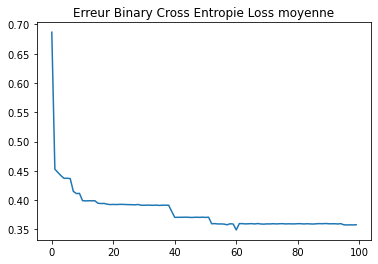

In [29]:
np.random.seed(42)
nb_classes = len(np.unique(Y_train))
n_samples = X_train.shape[0]

neuro_i_1 = 256
neuro_o_1 = 200
neuro_i_2 = 200
neuro_o_2 = 160
neuro_i_3 = 160
neuro_o_3 = 120
neuro_i_4 = 120
neuro_o_4 = 70
neuro_i_5 = 70
neuro_o_5 = 40
neuro_i_6 = 40
neuro_o_6 = 10


facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 100
epochs = 100
nb_couches = 4


facteur_norma = 0.8


lineaire_1_enc = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_enc = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
lineaire_3_enc = ModuleLineaire(neuro_i_3 ,neuro_o_3 ,plage_biais,facteur_norma,init=1)
lineaire_4_enc = ModuleLineaire(neuro_i_4 ,neuro_o_4 ,plage_biais,facteur_norma,init=1)
lineaire_5_enc = ModuleLineaire(neuro_i_5 ,neuro_o_5 ,plage_biais,facteur_norma,init=1)
lineaire_6_enc = ModuleLineaire(neuro_i_6 ,neuro_o_6 ,plage_biais,facteur_norma,init=1)

lineaire_1_dec = ModuleLineaire(neuro_o_1 ,neuro_i_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_dec = ModuleLineaire(neuro_o_2 ,neuro_i_2 ,plage_biais,facteur_norma,init=1)
lineaire_3_dec = ModuleLineaire(neuro_o_3 ,neuro_i_3 ,plage_biais,facteur_norma,init=1)
lineaire_4_dec = ModuleLineaire(neuro_o_4 ,neuro_i_4 ,plage_biais,facteur_norma,init=1)
lineaire_5_dec = ModuleLineaire(neuro_o_5 ,neuro_i_5 ,plage_biais,facteur_norma,init=1)
lineaire_6_dec = ModuleLineaire(neuro_o_6 ,neuro_i_6 ,plage_biais,facteur_norma,init=1)

TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
BCE = BinaryCrossEntropie()


network_layers = [lineaire_1_enc,TanH,lineaire_2_enc,TanH,lineaire_3_enc,TanH,
                  lineaire_4_enc,TanH,lineaire_5_enc,TanH,lineaire_6_enc,TanH,
                  lineaire_6_dec,TanH,lineaire_5_dec,TanH,lineaire_4_dec,TanH,
                  lineaire_3_dec,TanH,lineaire_2_dec,TanH,lineaire_1_dec,sigmoide]
network = Sequentiel(network_layers)

auto_encodeur_usps = AutoEncodeur(network,BCE)

auto_encodeur_usps.optimisation(X_train,Y_train,batch_size,epochs,1e-4)

In [30]:
latent_repre = auto_encodeur_usps.encode(X_train)
X_train_hat = auto_encodeur_usps.decode(latent_repre)

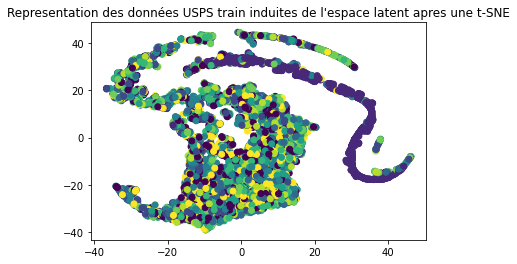

In [31]:
tsne = TSNE(n_components=2, init='pca',n_iter=500, verbose=0)
repre_2D = tsne.fit_transform(X_train_hat)

plt.title("Representation des données USPS train induites de l'espace latent apres une t-SNE")
plt.scatter(repre_2D[:,0],repre_2D[:,1],c=Y_train)

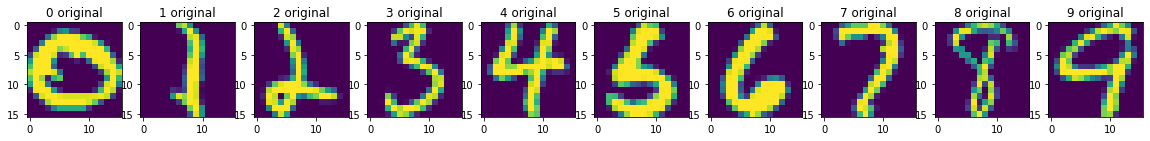

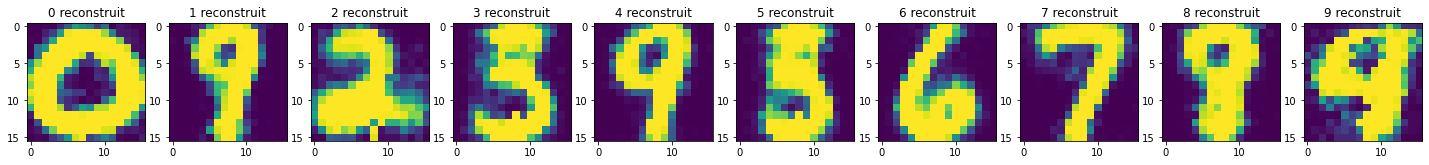

In [35]:
plt.figure(figsize=(20,15))
sample = np.random.randint(0,100)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" original")
    image = X_test[Y_test == i][sample].reshape((16,16))
    plt.imshow(image)
plt.show()

plt.figure(figsize=(25,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" reconstruit")
    image = X_test_hat[Y_test == i][sample].reshape((16,16))
    plt.imshow(image)
plt.show()

#### variation du nombre d'epochs

In [ ]:
np.random.seed(42)
nb_classes = len(np.unique(Y_train))
n_samples = X_train.shape[0]

neuro_i_1 = 256
neuro_o_1 = 160
neuro_i_2 = 160
neuro_o_2 = 120
neuro_i_3 = 120
neuro_o_3 = 60
neuro_i_4 = 60
neuro_o_4 = 10
facteur_norma = 0.4
plage_biais = (0,1)
batch_size = 100
#epochs_list = [20,50,100,150,200,300]
batch_list = [20,50]
epochs = 100
nb_couches = 4


facteur_norma = 0.8



lineaire_1_enc = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_enc = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)
lineaire_3_enc = ModuleLineaire(neuro_i_3 ,neuro_o_3 ,plage_biais,facteur_norma,init=1)
lineaire_4_enc = ModuleLineaire(neuro_i_4 ,neuro_o_4 ,plage_biais,facteur_norma,init=1)

lineaire_1_dec = ModuleLineaire(neuro_o_1 ,neuro_i_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_dec = ModuleLineaire(neuro_o_2 ,neuro_i_2 ,plage_biais,facteur_norma,init=1)
lineaire_3_dec = ModuleLineaire(neuro_o_3 ,neuro_i_3 ,plage_biais,facteur_norma,init=1)
lineaire_4_dec = ModuleLineaire(neuro_o_4 ,neuro_i_4 ,plage_biais,facteur_norma,init=1)

TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
BCE = BinaryCrossEntropie()


network_layers = [lineaire_1_enc,TanH,lineaire_2_enc,TanH,lineaire_3_enc,TanH,lineaire_4_enc,TanH,
                  lineaire_4_dec,TanH,lineaire_3_dec,TanH,lineaire_2_dec,TanH,lineaire_1_dec,sigmoide]
network = Sequentiel(network_layers)

#auto_encodeur_usps_list = [AutoEncodeur(network,BCE),AutoEncodeur(network,BCE),AutoEncodeur(network,BCE)
 #                         AutoEncodeur(network,BCE),AutoEncodeur(network,BCE),AutoEncodeur(network,BCE)]

auto_encodeur_usps_list = [AutoEncodeur(network,BCE),AutoEncodeur(network,BCE)]
for i,batch_size in enumerate(batch_list):
    auto_encodeur_usps_list[i].optimisation(X_train,Y_train,batch_size,epochs,1e-4)

Optimisation
Batch size :  20
Epochs :  100
Learning rate :  0.0001


  5%|██▏                                        | 5/100 [00:30<10:50,  6.85s/it]

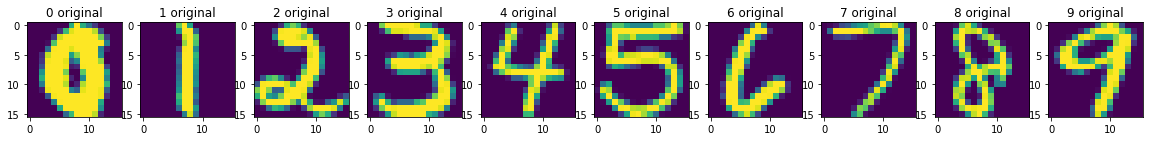

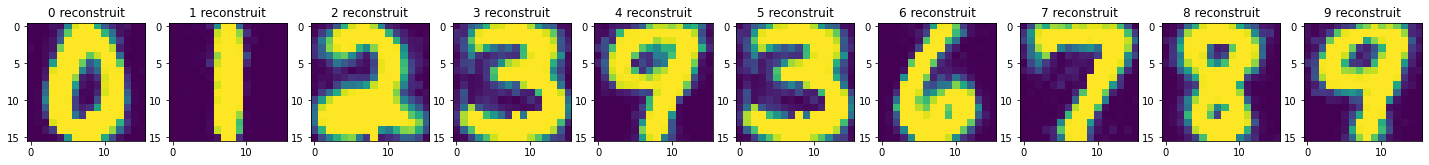

In [43]:
latent_repre = auto_encodeur_usps_list[5].encode(X_train)
X_train_hat = auto_encodeur_usps_list[5].decode(latent_repre)

plt.figure(figsize=(20,15))
sample = np.random.randint(0,100)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" original")
    image = X_test[Y_test == i][sample].reshape((16,16))
    plt.imshow(image)
plt.show()

plt.figure(figsize=(25,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" reconstruit")
    image = X_test_hat[Y_test == i][sample].reshape((16,16))
    plt.imshow(image)
plt.show()

In [44]:
auto_encodeur_usps_list[5].opti.getNetwork().getModules()[0]._parameters

array([[-0.18546933,  0.66600173,  0.27511068, ...,  0.41897061,
        -0.41259771,  0.34356969],
       [-0.17350274,  0.00486336, -0.08984224, ..., -0.51961708,
        -0.58792428, -0.56494218],
       [ 0.05875178,  0.08828873, -0.07747421, ...,  0.09004004,
         0.58847634, -0.27915751],
       ...,
       [-0.62213402,  0.17063631, -0.11367939, ..., -0.42539881,
        -0.46647392,  0.2410851 ],
       [-0.61494724, -0.2251282 , -0.42822682, ...,  0.38816698,
         0.01425227, -0.34378548],
       [-0.24213254, -0.54560653, -0.27791861, ...,  0.08904814,
        -0.24286985, -0.67090086]])

In [45]:
auto_encodeur_usps_list[0].opti.getNetwork().getModules()[0]._parameters

array([[-0.18546933,  0.66600173,  0.27511068, ...,  0.41897061,
        -0.41259771,  0.34356969],
       [-0.17350274,  0.00486336, -0.08984224, ..., -0.51961708,
        -0.58792428, -0.56494218],
       [ 0.05875178,  0.08828873, -0.07747421, ...,  0.09004004,
         0.58847634, -0.27915751],
       ...,
       [-0.62213402,  0.17063631, -0.11367939, ..., -0.42539881,
        -0.46647392,  0.2410851 ],
       [-0.61494724, -0.2251282 , -0.42822682, ...,  0.38816698,
         0.01425227, -0.34378548],
       [-0.24213254, -0.54560653, -0.27791861, ...,  0.08904814,
        -0.24286985, -0.67090086]])

In [60]:
latent_repre = auto_encodeur_usps.encode(X_train)
kmeans = KMeans(n_clusters=10, random_state=0, max_iter=100).fit(latent_repre)
yhat = kmeans.labels_

print("Pureté du clustering : ",cluster_purity(yhat,Y_train))
print("Rand score  : ",rand_score(yhat,Y_train))
print("Adjusted Rand Score : ",adjusted_rand_score(yhat,Y_train))

Pureté du clustering :  0.5435864504735912
Rand score  :  0.8783647931810034
Adjusted Rand Score :  0.35575037637929546


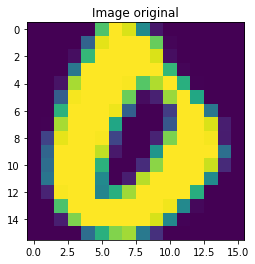

Similarité sur les images de test  :  0.884001303356142


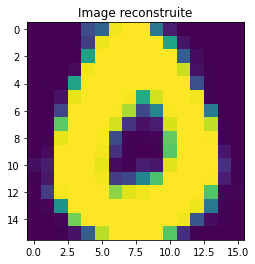

In [61]:
affiche_image(X_test,15,"Image original")
plt.show()
affiche_image(X_test_hat,15,"Image reconstruite")

# calculer l'accuracy de similarité entre l'image sortie du reseau et l'image de base
print("Similarité sur les images de test  : ",similarity(X_test_hat,X_test))

In [24]:
def cluster_purity(labels_true, labels_pred):

    labels_true = np.asarray(labels_true)
    labels_pred = np.asarray(labels_pred)
    assert labels_true.shape == labels_pred.shape  
    
    # Trouver les étiquettes les plus communes dans chaque cluster
    clusters = np.unique(labels_pred)
    n = len(labels_true)
    counts = np.zeros((len(clusters), len(np.unique(labels_true))))
    for i, c in enumerate(clusters):
        mask = labels_pred == c
        labels = labels_true[mask]
        counts[i, :] = np.bincount(labels, minlength=len(counts[i, :]))
    
    # Trouver la pureté en utilisant les étiquettes les plus communes
    purity = np.sum(np.max(counts, axis=1)) / n
    
    return purity

In [46]:
latent_repre = auto_encodeur_usps.encode(X_train)

kmeans = KMeans(n_clusters=10, random_state=0, max_iter=100).fit(latent_repre)
yhat = kmeans.labels_

print("Pureté du clustering : ",cluster_purity(yhat,Y_train))
print("Rand score  : ",rand_score(yhat,Y_train))
print("Adjusted Rand Score : ",adjusted_rand_score(yhat,Y_train))

Pureté du clustering :  0.6445657408893883
Rand score  :  0.8979527152143212
Adjusted Rand Score :  0.46372700582144394


In [44]:
yhat

array([6, 1, 3, ..., 0, 6, 8], dtype=int32)

## Represenation latente et clustering

### Credit Card without labels

In [2]:
cc_data = pd.read_csv("data/CC GENERAL.csv")

In [3]:
cc_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
# supprimer les valeurs NaN
cc_data = cc_data.dropna()

cc_data = np.array(cc_data)
# supprimer la colonne 1
cc_data = cc_data[:,1:]
cc_data = cc_data.astype('float')
y = np.random.randint(0,1,cc_data.shape[0])

data_norm = normalisation(cc_data)
data_norm = data_norm.astype('float')

Optimisation
Batch size :  200
Epochs :  200
Learning rate :  0.0001


100%|█████████████████████████████████████████| 200/200 [00:05<00:00, 34.62it/s]


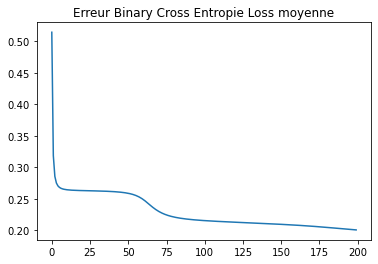

In [5]:
np.random.seed(42)
n_samples = data_norm.shape[0]

neuro_i_1 = 17
neuro_o_1 = 10
neuro_i_2 = 10
neuro_o_2 = 7

plage_biais = (0,1)
batch_size = 200
epochs = 200
nb_couches = 2


facteur_norma = 0.8
lineaire_1_enc = ModuleLineaire(neuro_i_1 ,neuro_o_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_enc = ModuleLineaire(neuro_i_2 ,neuro_o_2 ,plage_biais,facteur_norma,init=1)

lineaire_1_dec = ModuleLineaire(neuro_o_1 ,neuro_i_1 ,plage_biais,facteur_norma,init=1)
lineaire_2_dec = ModuleLineaire(neuro_o_2 ,neuro_i_2 ,plage_biais,facteur_norma,init=1)


TanH = ModuleTanH()
sigmoide = ModuleSigmoide()
BCE = BinaryCrossEntropie()


network_layers = [lineaire_1_enc,sigmoide,lineaire_2_enc,TanH,
                  lineaire_2_dec,sigmoide,lineaire_1_dec,sigmoide]
network = Sequentiel(network_layers)

auto_encodeur_ccdata = AutoEncodeur(network,BCE)

auto_encodeur_ccdata.optimisation(data_norm,y,batch_size,epochs,1e-4)

latent_repre = auto_encodeur_ccdata.encode(data_norm)
data_norm_hat = auto_encodeur_ccdata.decode(latent_repre)

In [6]:
kmeans = KMeans(n_clusters=10, random_state=0, max_iter=100).fit(data_norm_hat)

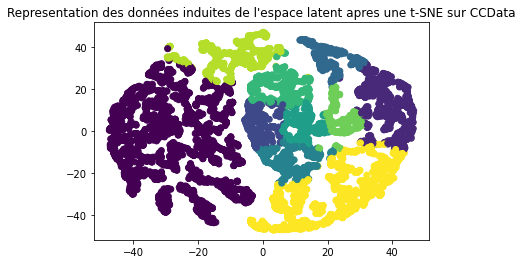

In [7]:
yhat = kmeans.labels_

tsne = TSNE(n_components=2, init='pca',n_iter=500, verbose=0)
repre_2D = tsne.fit_transform(data_norm_hat)

plt.title("Representation des données induites de l'espace latent apres une t-SNE sur CCData")
plt.scatter(repre_2D[:,0],repre_2D[:,1],c=yhat)

## Debruitage de données

Données avant bruitage


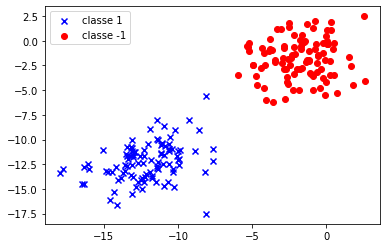

Données apres bruitage


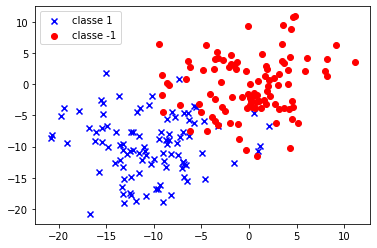

In [16]:
seed = 42
np.random.seed(seed)
pos_cen = (-12, -12)
pos_sig = [[1, 4], [4, 1]]

neg_cen = (-2, -2)
neg_sig = [[1, 5], [4, 1]]
data,labels = genere_dataset_gaussian(pos_cen,pos_sig,neg_cen,neg_sig,100,-1,1)
print("Données avant bruitage")
plot2DSet(data,labels,-1,1)

shape = data.shape
mean = 2
std = 4
noise = generate_noise(shape,'normal',mean,std)

data_noised = data + noise
print("Données apres bruitage")
plot2DSet(data_noised,labels,-1,1)

In [3]:
import pandas as pd

letters_data = pd.read_csv("data/digital_letters.csv")

In [4]:
letters_data = np.array(letters_data)
letters_labels = letters_data[:,-1]
letters_data = letters_data[:,1:-1]

caracteres = np.unique(letters_labels)
letters_data_bis = []
letters_labels_bis = []
for cara in caracteres:
    letters_data_bis.extend(letters_data[letters_labels == cara][:300])
    letters_labels_bis.extend(letters_labels[letters_labels == cara][:300])
    
letters_data = np.array(letters_data_bis)
letters_labels = np.array(letters_labels_bis)
print(letters_data.shape)
print(letters_labels.shape)

(7800, 784)
(7800,)


In [5]:
noise = generate_noise(letters_data.shape[1],'normal',1e-1,1e-1)
letters_data = letters_data.astype('float')
letters_data_noised = letters_data + noise
print(letters_data_noised.shape)

(7800, 784)


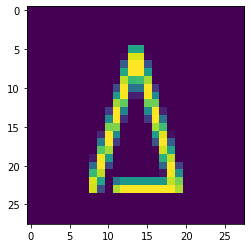

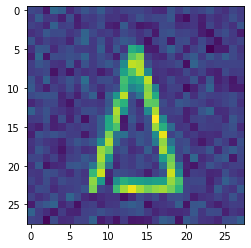

In [6]:
letters_data_norm = normalisation(letters_data)
letters_data_norm_noised = letters_data_norm + noise

plt.imshow(letters_data_norm[0].reshape((28,28)))
plt.show()
plt.imshow(letters_data_norm_noised[0].reshape((28,28)))
plt.show()


In [13]:
def create_auto_encodeur(X_train, input_dim, nb_couche_lin, facteur_norma, plage_biais, batch_size, epochs):
    np.random.seed(42)
    n_samples = X_train.shape[0]
    neuro_in = [input_dim]
    neuro_out = []
    for i in range(0,nb_couche_lin) : 
        neuro_out.append(neuro_in[::-1][0] // 2)
        neuro_in.append(neuro_out[::-1][0])
    neuro_in = neuro_in [:-1]
    modules_enc = []
    for i in range(nb_couche_lin -1):
        modules_enc.append(ModuleLineaire(neuro_in[i], neuro_out[i], plage_biais, facteur_norma, init=1))
        modules_enc.append(ModuleTanH())
        
    modules_enc.append(ModuleLineaire(neuro_in[nb_couche_lin-1], neuro_out[nb_couche_lin-1], plage_biais, facteur_norma, init=1))

    modules_dec = []
    #neuro_out = neuro_out[::-1]
    neuro_in = neuro_in[::-1]
    neuro_out = neuro_out[::-1]
    for i in range(nb_couche_lin-1):
        modules_dec.append(ModuleLineaire(neuro_out[i], neuro_in[i], plage_biais, facteur_norma, init=1))
        modules_dec.append(ModuleTanH())
        
    modules_dec.append(ModuleLineaire(neuro_out[nb_couche_lin-1], neuro_in[nb_couche_lin-1], plage_biais, facteur_norma, init=1))
    modules_dec.append(ModuleSigmoide())
    
    network = Sequentiel(modules_enc + modules_dec)
    BCE = BinaryCrossEntropie()
    auto_encodeur_usps = AutoEncodeur(network, BCE)
    auto_encodeur_usps.optimisation(X_train, X_train, batch_size, epochs,1e-6)
    
    return auto_encodeur_usps


100%|█████████████████████████████████████████| 200/200 [50:51<00:00, 15.26s/it]


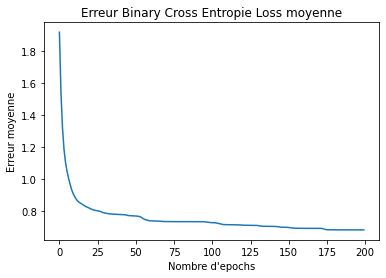

In [14]:
shape = letters_data_norm_noised.shape[1]
nb_layers = 20
facteur_norma = 0.8
plage_biais = (0,1)
batch_size = 50
epochs = 200

letters_auto_encodeur = create_auto_encodeur(letters_data_norm_noised,shape,nb_layers,facteur_norma,plage_biais,batch_size,epochs)

In [15]:
latent_repre = letters_auto_encodeur.encode(letters_data_norm_noised)
letters_data_norm_noised_hat = letters_auto_encodeur.decode(latent_repre)

In [16]:
latent_repre

#np.where((letters_data_noised == np.nan) == True , 1, 0).sum()

array([], shape=(7800, 0), dtype=float64)

In [11]:
letters_auto_encodeur.opti.getNetwork().getModules()[0]._gradient_parametres

array([[ 8.67924848e-03,  1.06584261e-02,  1.18763431e-03, ...,
         4.39431974e-04,  1.09053555e-02, -1.55909713e-04],
       [ 6.91932665e-03,  8.49717942e-03,  9.46813512e-04, ...,
         3.50326803e-04,  8.69403811e-03, -1.24295350e-04],
       [-3.49192170e-03, -4.28820414e-03, -4.77820866e-04, ...,
        -1.76796649e-04, -4.38755126e-03,  6.27271487e-05],
       ...,
       [ 9.36247152e-03,  1.14974483e-02,  1.28112387e-03, ...,
         4.74023684e-04,  1.17638158e-02, -1.68182792e-04],
       [ 9.85431766e-03,  1.21014528e-02,  1.34842617e-03, ...,
         4.98925947e-04,  1.23818137e-02, -1.77018073e-04],
       [ 1.55512373e-02,  1.90974730e-02,  2.12797031e-03, ...,
         7.87362056e-04,  1.95399144e-02, -2.79354711e-04]])

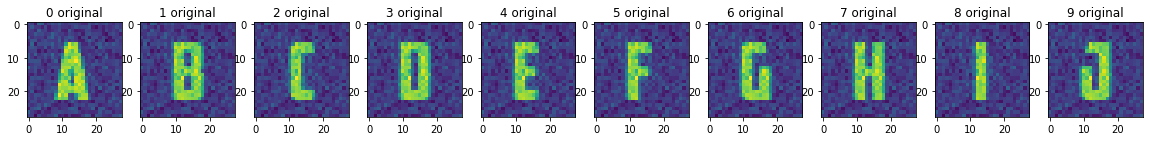

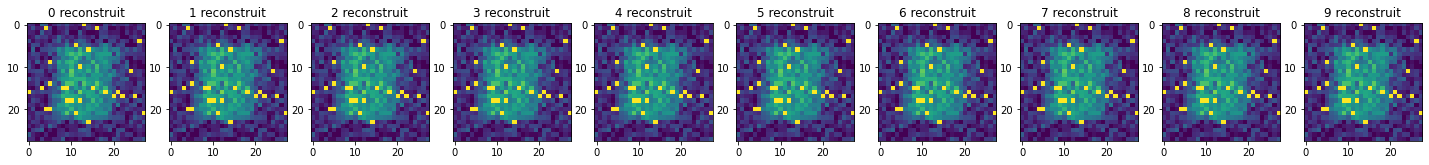

In [12]:
plt.figure(figsize=(20,15))
sample = np.random.randint(0,100)
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" original")
    image = letters_data_norm_noised[letters_labels == caracteres[i]][sample].reshape((28,28))
    plt.imshow(image)
plt.show()

plt.figure(figsize=(25,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(str(i)+" reconstruit")
    image = letters_data_norm_noised_hat[letters_labels == caracteres[i]][sample].reshape((28,28))
    plt.imshow(image)
plt.show()